# Self Organizing Maps

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

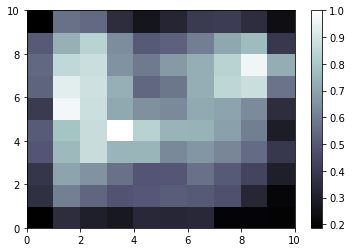

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

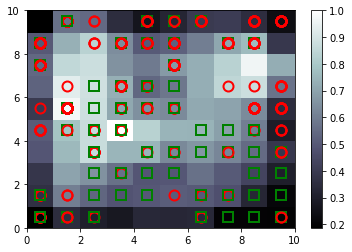

In [6]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [7]:
# Finding the frauds

mappings = som.win_map(X)

frauds = np.concatenate((mappings[(0,1)], mappings[(0,0)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

15796813.0
15753591.0
15731166.0
15797246.0
15800773.0
15729771.0
15701687.0
15735572.0
15751167.0
15778142.0
15721507.0
15802106.0
15812918.0
15715519.0
15812766.0
15784526.0
15757306.0
15769356.0
15808223.0
15631685.0
15649379.0
15587297.0
15609823.0
15614813.0
15571081.0
15706268.0
15653147.0
15625501.0
15630592.0
15636562.0
15687765.0
15589541.0
15700046.0
15569595.0
15598574.0
15587443.0
15711759.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


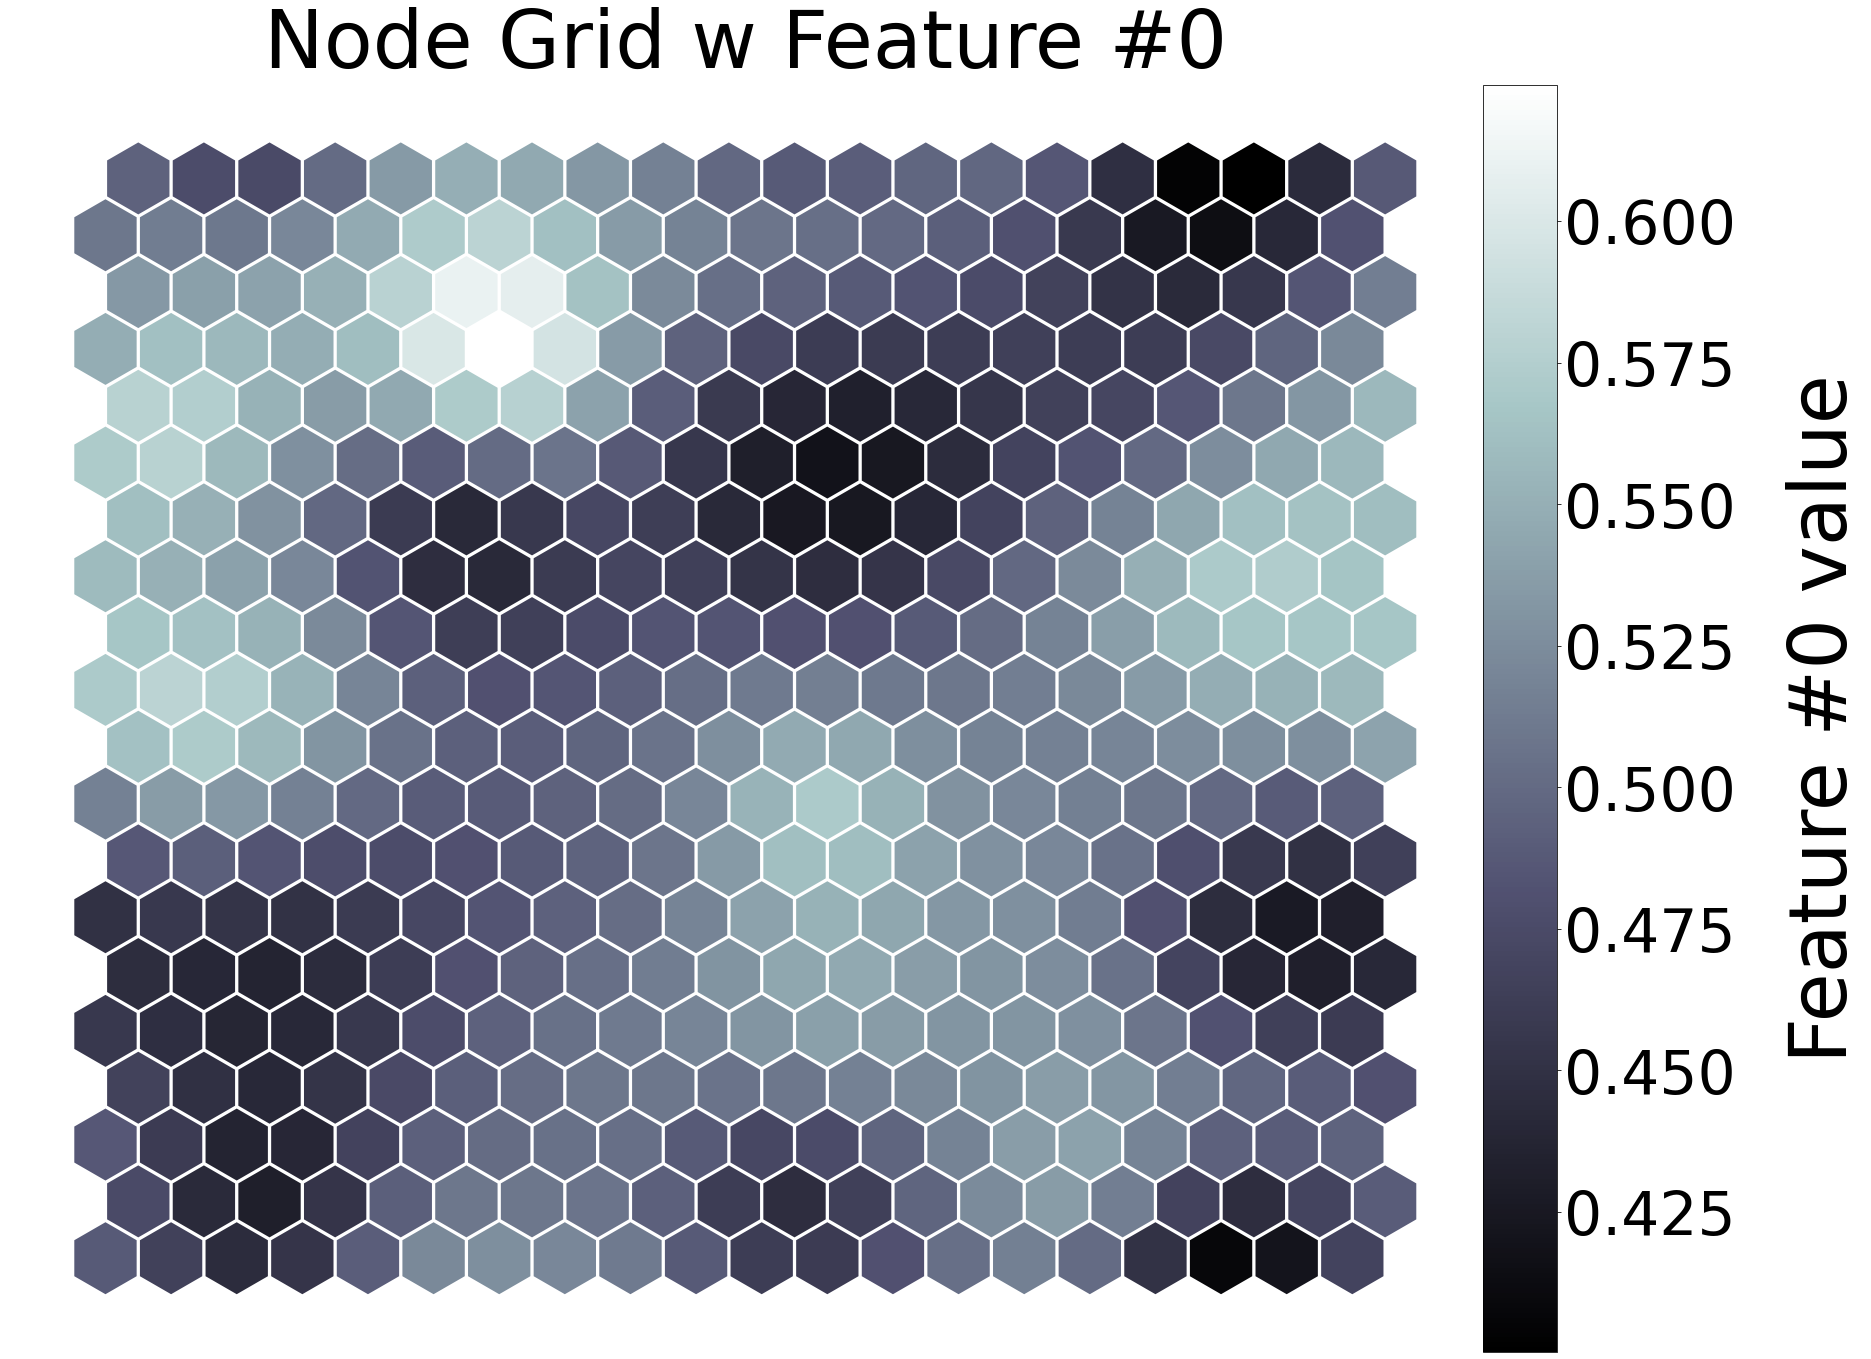

In [8]:
# ! pip install SimpSOM
import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.somNet(20, 20, X, PBC=True)
net.train(0.1, 1000)
# net.save(‘filename_weights’)
net.nodes_graph(colnum=0)

In [9]:
%%capture
net.diff_graph()
net.project(X)
net.cluster(X, type='qthresh')

Populating the interactive namespace from numpy and matplotlib


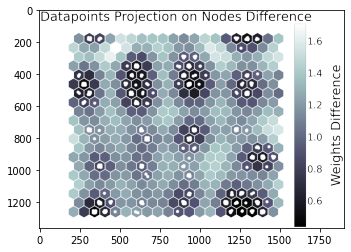

In [10]:
#Project the datapoints on the new 2D network map.
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('projection_difference.png')
imgplot = plt.imshow(img)
plt.show()

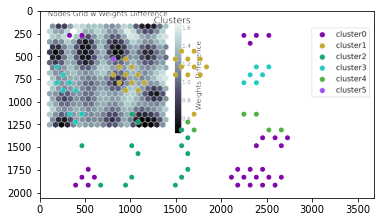

In [11]:
import numpy.ma as ma

#Cluster the datapoints according to the Quality Threshold algorithm.
nodes_dif = mpimg.imread('nodesDifference.png')
cluster = mpimg.imread('qthresh_clusters.png')

#Precisa de alguma especie de rescale pra ser mostrado em notebook
#Outra ideia e plotar o mapa iterando pelas coordenadas
mask = ma.masked_where(cluster>0, cluster)
cluster_mask = ma.masked_array(cluster,mask)

plt.imshow(nodes_dif)
plt.imshow(cluster_mask)

Aparentemente a rede identificou diversos casos semelhantes com decisões divergentes, especialmente quando os valores extremos estavam próximos um do outro, no primeiro mapa de features, apontado pelo mapa da diferença dos pesos. Vale lembrar que nenhum desses casos pode-se afirmar que é de fato uma fraude, mas é uma suspeita e o caso precisa ser estudado.